In [1]:
import os
import random

import pandas as pd
import numpy as np

import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, \
    classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from feature_engine.datetime import DatetimeFeatures
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport


In [2]:
sklearn.set_config(transform_output="pandas")

In [43]:
seed = 211233
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)

## Load data

In [4]:
train_raw = pd.read_excel("../ecomm-data/E Commerce Dataset.xlsx", sheet_name='E Comm')
ProfileReport(train_raw).to_file('report.html')

In [27]:
TARGET = "Churn"

In [34]:
features = ['Tenure',
            'PreferredLoginDevice',
            'CityTier',
            'WarehouseToHome',
            'PreferredPaymentMode',
            'Gender',
            'HourSpendOnApp',
            'NumberOfDeviceRegistered',
            'PreferedOrderCat',
            'SatisfactionScore',
            'MaritalStatus',
            'NumberOfAddress',
            'Complain',
            'OrderAmountHikeFromlastYear',
            'CouponUsed',
            'OrderCount',
            'DaySinceLastOrder',
            'CashbackAmount',
            ]
cat_features = ['PreferredPaymentMode', 'PreferredLoginDevice', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


In [35]:
y = train[TARGET]
X = train[features]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [47]:
DEFAULT_MODEL_CONFIG = {
    "iterations": 5000,
    "depth": 3,
    "learning_rate": 0.05,
    "verbose": 250,
    "random_seed": seed,
    "auto_class_weights": "SqrtBalanced",
}

In [48]:
model = CatBoostClassifier(**DEFAULT_MODEL_CONFIG, cat_features=cat_features)

In [49]:
model.fit(X_train, y_train)

0:	learn: 0.6626827	total: 27.1ms	remaining: 2m 15s
250:	learn: 0.2531599	total: 2.33s	remaining: 44s
500:	learn: 0.1917496	total: 4.93s	remaining: 44.3s
750:	learn: 0.1535600	total: 7.37s	remaining: 41.7s
1000:	learn: 0.1254395	total: 9.85s	remaining: 39.3s
1250:	learn: 0.1060943	total: 12.4s	remaining: 37s
1500:	learn: 0.0910653	total: 14.8s	remaining: 34.6s
1750:	learn: 0.0787938	total: 17s	remaining: 31.6s
2000:	learn: 0.0694806	total: 19.2s	remaining: 28.8s
2250:	learn: 0.0595356	total: 21.5s	remaining: 26.2s
2500:	learn: 0.0532514	total: 23.4s	remaining: 23.4s
2750:	learn: 0.0472909	total: 25.2s	remaining: 20.6s
3000:	learn: 0.0411734	total: 26.8s	remaining: 17.9s
3250:	learn: 0.0364543	total: 28.7s	remaining: 15.4s
3500:	learn: 0.0324205	total: 30s	remaining: 12.8s
3750:	learn: 0.0288444	total: 31.2s	remaining: 10.4s
4000:	learn: 0.0262170	total: 32.3s	remaining: 8.06s
4250:	learn: 0.0240496	total: 33.8s	remaining: 5.96s
4500:	learn: 0.0219441	total: 35.6s	remaining: 3.94s
4750:

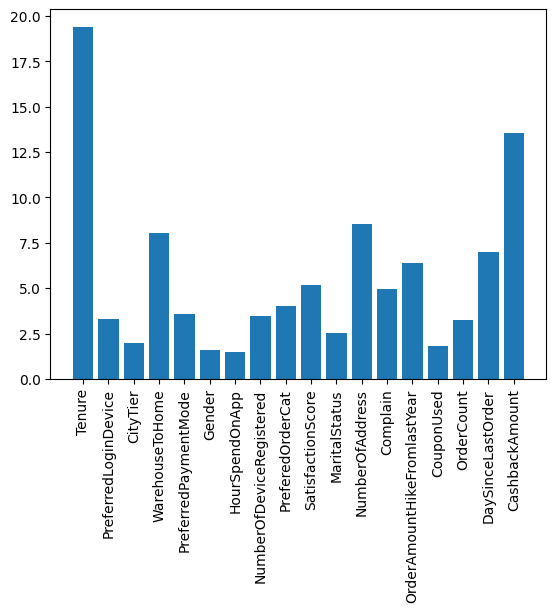

In [50]:
y_pred = model.predict(X_test)
plt.bar(features, model.get_feature_importance())
plt.xticks(rotation=90)
plt.show()


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       630
           1       0.95      0.90      0.92       125

    accuracy                           0.97       755
   macro avg       0.96      0.94      0.95       755
weighted avg       0.97      0.97      0.97       755

